In [6]:
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from statsmodels.robust.scale import mad

In [8]:
single = pd.read_csv("Final_results_April/ 2025-02-23_21_46/merged_results.csv")
parallel = pd.read_csv("Final_results_April/parallel_results.csv")

In [17]:
single['Experiment'] = single['Experiment'].str.extract(r'S(\d+)').astype(int)
parallel['Experiment'] = parallel['Experiment'].str.extract(r'P(\d+)').astype(int)

In [18]:
single["Type"]="Single"
parallel["Type"]="Parallel"
df_all = pd.concat([single,parallel])
df_all

,Experiment,Run,Correlation,MAE,RMSE,Time,FirstFeature,SecondFeature,ThirdFeature,FourthFeature,FifthFeature,Type
0,1,1,0.891913,2.882447,4.567592,1733.362,x10*x6,troot(x13)*x10,x13,x11,x8,Single
1,2,1,0.880953,3.050825,4.859650,2175.454,x9*x6,p0(x13)*x9,x1,x6,x5,Single
2,3,1,0.859209,3.185866,5.541363,1916.747,x9*x6,x11,x1,p0(x13)*x9,x8,Single
3,4,1,0.877574,3.072561,4.976805,1678.669,x9*x6,p0(x13)*x9,x9,x8,x6,Single
4,5,1,0.855492,3.257906,5.492229,1448.307,(x6*x11)*x9,x10*x13,p3(x6),sigmoid(x13)*x9,x1,Single
...,...,...,...,...,...,...,...,...,...,...,...,...
175,6,26,0.850562,3.268792,5.922367,399.287,x9,x10,x6*x10,x11,x1,Parallel
176,6,27,0.780113,3.845170,8.503439,425.118,x11,x10,x10*x6,x6*x6,sigmoid(x8*x13),Parallel
177,6,28,0.653618,5.292347,18.277882,397.927,x8,x12,x1,x9,x6,Parallel
178,6,29,0.834460,3.519061,6.761084,468.455,x11,x10,x9,x6,x1,Parallel


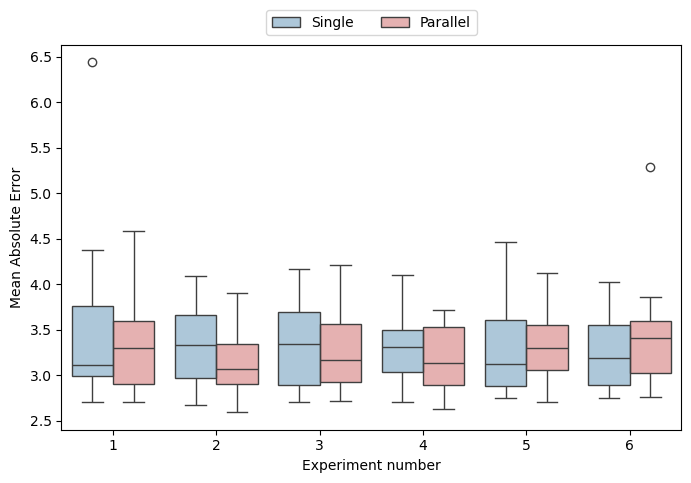

In [23]:
color_palette = ["#1f77b4", "#d62728"]  # Blue and Red colors with 20% opacity
# Create boxplot
f = plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df_all, x="Experiment", y="MAE", hue = "Type", palette=color_palette, 
                 fliersize=6,     
                 linewidth=1,   
                 patch_artist=True,
                 showfliers=True)
for patch in ax.patches:
    patch.set_facecolor((patch.get_facecolor()[0], patch.get_facecolor()[1], patch.get_facecolor()[2], 0.4))  # Adjust alpha (0.4 is transparency)

#Labels 
plt.xlabel("Experiment number")
plt.ylabel("Mean Absolute Error")

# Adjusting the legend to have transparent boxes (20% opacity)
legend = ax.get_legend()

# Adjust the handles in the legend (boxes) to be transparent
for handle in legend.legend_handles:
    handle.set_alpha(0.2) 
plt.legend(loc='upper center', ncol=2, borderaxespad=-2.5, handlelength=2)

f.savefig("boxplots_Housing_MAE_initial.pdf", transparent=True, bbox_inches='tight')
plt.show()